# MSDS 430 Final Project

#### Project Overview 
The final project examines a "movies" data set provided by Kaggle that fits two models to predict gross. The data set includes 15 variables and 6820 rows featuring information about movies released theatrically between the years 1986 and 2016. In this notebook,  exploratory data analysis is conducted to evaluate potential relations to the target variable gross. The data set is then prepared for modeling. Linear Regression and Ridge Regression methods are used and compared using mean squared error (MSE).  Plots are added to evaluate the relationship between predictor variables and gross.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

movies = pd.read_csv("/Users/corybaumgarten/Documents/Northwestern/2019/2019WI_MSDS_430-DL_SEC56/Final Project/movies.csv",encoding = "ISO-8859-1")

# encoding option @ https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python



In [2]:
# Movies data set consists of 6820 records and 15 columns

movies.shape

(6820, 15)

### Exploratory Data Analysis

All 15 variables will remain in the data set for analysis and consideration into the model.

In [3]:
# data quality check
movies.isna().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [4]:
# first 5 rows
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
# overview of quantitative metrics

movies.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


Use numpy to calculate mean budget, gross, runtime, and score.

In [6]:
print("Mean budget is", round(np.mean(movies.budget),2)) # mean budget
print("Mean gross is", round(np.mean(movies.gross),2)) # mean gross
print("Mean runtime is", round(np.mean(movies.runtime/60),2)) # mean runtime in hours
print("Mean score is", round(np.mean(movies.score),2)) # mean score

Mean budget is 24581129.07
Mean gross is 33497828.62
Mean runtime is 1.78
Mean score is 6.37


In [7]:
# mean budget and gross by genre

bg = movies[['budget','gross','genre']]
bg.groupby(['genre']).mean()/1000000 # mean budget and gross by genre in millions

,budget,gross
genre,,
Action,48.889804,56.192813
Adventure,37.301607,53.303808
Animation,64.326715,91.488098
Biography,16.955936,24.004253
Comedy,14.922145,25.742031
Crime,16.275765,19.574399
Drama,13.264353,17.454725
Family,8.537857,8.436443
Fantasy,15.763813,20.145410


In [8]:
# overview of gross by genre

movies.groupby('genre')['gross'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1331.0,5.619281e+07,8.364603e+07,547.0,6914048.50,26873932.0,6.859523e+07,936662225.0
Adventure,392.0,5.330381e+07,8.102622e+07,10230.0,5966297.25,20839239.0,5.893822e+07,408010692.0
Animation,277.0,9.148810e+07,9.697904e+07,5274.0,13596911.00,58867694.0,1.435286e+08,486295561.0
Biography,359.0,2.400425e+07,3.689086e+07,2670.0,1650605.50,8323085.0,3.060400e+07,255959475.0
Comedy,2080.0,2.574203e+07,3.742141e+07,309.0,1687347.25,10912053.5,3.467921e+07,330252182.0
Crime,522.0,1.957440e+07,2.985027e+07,441.0,655195.00,6477760.5,2.513003e+07,183405771.0
Drama,1444.0,1.745472e+07,3.665703e+07,1800.0,504095.75,3528566.0,1.891123e+07,658672302.0
Family,14.0,8.436443e+06,8.047000e+06,781727.0,2138406.00,5538349.0,1.144100e+07,26459681.0
Fantasy,32.0,2.014541e+07,2.861964e+07,3478.0,1657111.25,11034888.0,2.023836e+07,101071502.0


In [9]:
# correlation matrix to evaluate potential variable selection.
movies.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


Use matplotlib to create two visual displays to examine the relationship between gross and budget.

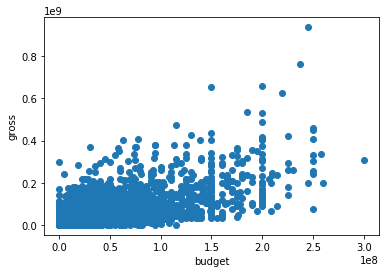

In [10]:
# matplot lib scatter of budget and gross

budget = movies['budget']
gross = movies['gross']


plt.scatter(budget,gross)
plt.ylabel('gross')
plt.xlabel('budget')
plt.show()

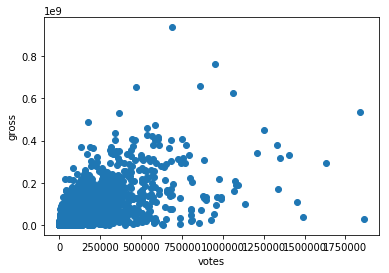

In [11]:
# matplot lib scatter of votes and gross

votes = movies['votes']

plt.scatter(votes,gross)
plt.ylabel('gross')
plt.xlabel('votes')
plt.show()

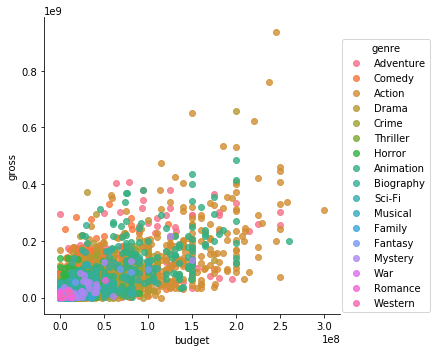

In [12]:
# Seaborn scatterplot of gross and budget by genre

sns.lmplot('budget', 'gross', data=movies, hue="genre", fit_reg=False)
plt.show()

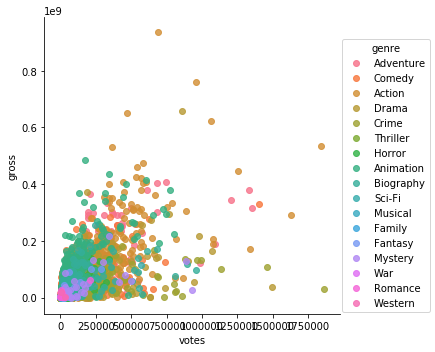

In [13]:
# Seaborn scatterplot of gross and votes by genre

sns.lmplot('votes', 'gross', data=movies, hue="genre", fit_reg=False)
plt.show()

### Data Preparation

In [14]:
movies.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

We will consider US films only to reduce the amount of noise and potential applicability of the model (assuming this model is used by movie studios based in the US).

In [15]:
# make a copy of the original data set
movies_new = movies.copy()

# create a variable to filter for films released USA
is_usa =  movies_new['country']=='USA'
movies_new = movies_new[is_usa]

In [16]:
movies_new.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [17]:
# 4872 US films

movies_new.shape

(4872, 15)

Next, we'll drop variables with low correlation to the target variable (gross).

In [18]:
# Drop company, country, director, name, star, writer
movies_new.drop('company', axis=1, inplace=True)
movies_new.drop('country', axis=1, inplace=True)
movies_new.drop('director', axis=1, inplace=True)
movies_new.drop('name', axis=1, inplace=True)
movies_new.drop('released', axis=1, inplace=True)
movies_new.drop('star', axis=1, inplace=True)
movies_new.drop('writer', axis=1, inplace=True)
movies_new.head()

,budget,genre,gross,rating,runtime,score,votes,year
0,8000000.0,Adventure,52287414.0,R,89,8.1,299174,1986
1,6000000.0,Comedy,70136369.0,PG-13,103,7.8,264740,1986
2,15000000.0,Action,179800601.0,PG,110,6.9,236909,1986
3,18500000.0,Action,85160248.0,R,137,8.4,540152,1986
4,9000000.0,Adventure,18564613.0,PG,90,6.9,36636,1986


In [19]:
movies_new.dtypes

budget     float64
genre       object
gross      float64
rating      object
runtime      int64
score      float64
votes        int64
year         int64
dtype: object

In [20]:
# Define categorical variables
movies_new['genre'] = pd.Categorical(movies_new['genre'])
movies_new['rating'] = pd.Categorical(movies_new['rating'])

In [21]:
movies_new.head()

,budget,genre,gross,rating,runtime,score,votes,year
0,8000000.0,Adventure,52287414.0,R,89,8.1,299174,1986
1,6000000.0,Comedy,70136369.0,PG-13,103,7.8,264740,1986
2,15000000.0,Action,179800601.0,PG,110,6.9,236909,1986
3,18500000.0,Action,85160248.0,R,137,8.4,540152,1986
4,9000000.0,Adventure,18564613.0,PG,90,6.9,36636,1986


In [22]:
# Transform categorical variables into dummy variables
movies_new = pd.get_dummies(movies_new, drop_first=True)
movies_new.head()

,budget,gross,runtime,score,votes,year,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,...,genre_Sci-Fi,genre_Thriller,genre_War,rating_NC-17,rating_NOT RATED,rating_Not specified,rating_PG,rating_PG-13,rating_R,rating_UNRATED
0,8000000.0,52287414.0,89,8.1,299174,1986,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6000000.0,70136369.0,103,7.8,264740,1986,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,15000000.0,179800601.0,110,6.9,236909,1986,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,18500000.0,85160248.0,137,8.4,540152,1986,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9000000.0,18564613.0,90,6.9,36636,1986,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
movies_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 6818
Data columns (total 28 columns):
budget                  4872 non-null float64
gross                   4872 non-null float64
runtime                 4872 non-null int64
score                   4872 non-null float64
votes                   4872 non-null int64
year                    4872 non-null int64
genre_Adventure         4872 non-null uint8
genre_Animation         4872 non-null uint8
genre_Biography         4872 non-null uint8
genre_Comedy            4872 non-null uint8
genre_Crime             4872 non-null uint8
genre_Drama             4872 non-null uint8
genre_Family            4872 non-null uint8
genre_Fantasy           4872 non-null uint8
genre_Horror            4872 non-null uint8
genre_Musical           4872 non-null uint8
genre_Mystery           4872 non-null uint8
genre_Romance           4872 non-null uint8
genre_Sci-Fi            4872 non-null uint8
genre_Thriller          4872 non-null uint8
genre_W

### Linear Regression

Linear Regression is used due to the linear relationship between gross and the two correlated variables identified in EDA step.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [25]:
# features to use in linear regression
cols_lr = ['budget','votes']

In [26]:
movies_lr = movies_new[cols_lr]

In [27]:
# Split the data into training/testing sets
movies_lr_X_train = movies_lr[:-20]
movies_lr_X_test = movies_lr[-20:]

In [28]:
# Split the targets into training/testing sets
movies_lr_y_train = movies_new.gross[:-20]
movies_lr_y_test = movies_new.gross[-20:]

In [29]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [30]:
# Train the model using the training sets
regr.fit(movies_lr_X_train, movies_lr_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Make predictions using the testing set
movies_lr_y_pred = regr.predict(movies_lr_X_test)

In [32]:
# The coefficients and intercepts
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  0.78638673 182.65341375]
Intercept: 
 3725831.596045308


In [33]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(movies_lr_y_test, movies_lr_y_pred))

Mean squared error: 150496615744682.56


In [34]:
# Explained variance score: 1 is perfect prediction
print('R-Squared: %.2f' % r2_score(movies_lr_y_test, movies_lr_y_pred))

R-Squared: 0.44


In [35]:
regr.score(movies_lr_X_test,movies_lr_y_test)

0.43868072027767163

### Ridge Regression

Ridge regression is considered to apply a "cost function" to account for variability by genre.

In [36]:
from sklearn.linear_model import Ridge

In [37]:
rr = Ridge(alpha=5)
rr_fit = rr.fit(movies_lr_X_train,movies_lr_y_train)

In [38]:
ridge_y_pred = rr.predict(movies_lr_X_test)

In [39]:
# The mean squared error
ridge_rss = mean_squared_error(movies_lr_y_test, ridge_y_pred)
print("Mean squared error:", ridge_rss)

Mean squared error: 150496615744681.06


In [40]:
# Explained variance score: 1 is perfect prediction
print('R-Squared: %.2f' % r2_score(movies_lr_y_test, ridge_y_pred))

R-Squared: 0.44


In [41]:
# compare linear regression with ridge regression using MSE

lr_rss = mean_squared_error(movies_lr_y_test, movies_lr_y_pred)

print(lr_rss - ridge_rss)

1.5


## Appendix

In [42]:
cols = ['budget','votes','runtime','score','year','genre_Adventure','genre_Animation','genre_Biography',
          'genre_Comedy','genre_Crime','genre_Drama','genre_Family','genre_Fantasy','genre_Horror','genre_Musical',
          'genre_Mystery','genre_Romance','genre_Sci-Fi','genre_Thriller','genre_War','rating_NC-17','rating_NOT RATED',
          'rating_Not specified','rating_PG','rating_PG-13','rating_R','rating_UNRATED']

In [43]:
# overview of gross by country

movies.groupby('country')['gross'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Argentina,13.0,3.521854e+06,6.746678e+06,19710.0,56103.00,624153.0,2804642.00,20167424.0
Aruba,1.0,1.007614e+07,NaN,10076136.0,10076136.00,10076136.0,10076136.00,10076136.0
Australia,82.0,1.980135e+07,4.504835e+07,8012.0,218990.50,1755758.5,14205505.00,257760692.0
Austria,6.0,1.153421e+07,2.091572e+07,13031.0,1351747.00,3692498.5,6425797.75,53898845.0
Bahamas,1.0,4.881700e+04,NaN,48817.0,48817.00,48817.0,48817.00,48817.0
Belgium,18.0,8.802549e+05,1.423630e+06,2623.0,127899.25,330233.5,1175874.25,5981749.0
Brazil,6.0,2.306297e+06,3.369954e+06,8060.0,128577.75,285389.5,4285777.25,7563397.0
Canada,150.0,1.530743e+07,3.657836e+07,1744.0,510490.50,2761968.0,13757165.00,241438208.0
Chile,4.0,7.357465e+06,6.664653e+06,938875.0,1992466.75,7266153.0,12631151.25,13958679.0


In [44]:
lr_train_score=regr.score(movies_lr_X_train, movies_lr_y_train)
lr_test_score=regr.score(movies_lr_X_test, movies_lr_y_test)

In [45]:
rr_train_score = rr.score(movies_lr_X_train,movies_lr_y_train)
rr_test_score = rr.score(movies_lr_X_test, movies_lr_y_test)

In [46]:
print("linear regression train score:", lr_train_score)
print("linear regression test score:", lr_test_score)
print("ridge regression train score:", rr_train_score)
print("ridge regression test score:", rr_test_score)

linear regression train score: 0.6149521630972116
linear regression test score: 0.43868072027767163
ridge regression train score: 0.6149521630972117
ridge regression test score: 0.4386807202776771
